*Prepared for the course "TDPS22: Data Science Programming" at Jönköping University, Teacher: [Marcel Bollmann](mailto:marcel.bollmann@ju.se)*

# Exercise 4: Machine Learning with Scikit-learn

This notebook contains exercises on machine learning with the Scikit-learn library. In particular, we'll focus on understanding the Scikit-learn API for training, applying, and evaluating models; how to prepare Pandas data for use with Scikit-learn; and how to visualize predictions made using Scikit-learn.

### Learning Goals

- Understand how to _train and apply different machine learning algorithms_ with Scikit-learn.
- Know how to _transform data_ between Pandas and the Scikit-learn API.
- Know how to _perform model validation_ with Scikit-learn.


In [3]:
try:
    from rich import load_ipython_extension
    %load_ext rich
except ImportError:
    try:
        from rich import pretty
        pretty.install()
    except ImportError:
        pass

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [10]:
# Load a predefined dataset from Seaborn
df = sns.load_dataset("penguins").dropna()
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


- - - 
## Regression

We'll use the same Penguins dataset that we used in Exercise 2 here. First, we'll look at some linear & polynomial regressions.

#### Useful Reference

+ ["Introducing Scikit-Learn"](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html) and ["In Depth: Linear Regression"](https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html) in the _Python Data Science Handbook_

Remember that Seaborn can give us scatter plots with a _linear regression_ line out of the box:

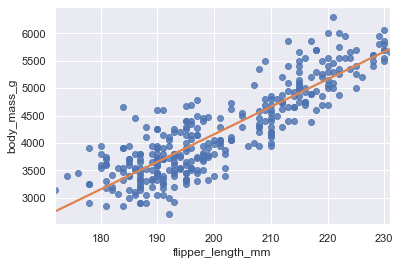

In [8]:
# We're going to recreate this linear regression in scikit-learn
orange = sns.color_palette()[1]
sns.regplot(
    data=df,
    x="flipper_length_mm",
    y="body_mass_g",
    ci=False,
    line_kws={"color": orange},  # to make the line slightly easier to see
);

**1. How can we reproduce & plot a linear regression using the Scikit-learn API?** This can be broken down into the following parts:

   1. fitting a linear regression model;
   2. predicting the values for the linear regression for the range that we're interested in;
   3. producing a scatter plot and plotting the linear regression line on top of it.
   
At the end, you should have a visualization that shows the same data as the Seaborn plot above. (_Can you also make the line color different, as I did above?_)

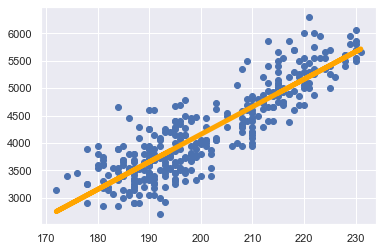

In [47]:
# YOUR CODE HERE
X = df[["flipper_length_mm"]]
y = df["body_mass_g"]

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, y)
y_pred = model.predict(X)

def plot_pred(y_pred, x_date, y):
    plt.scatter(x_date, y)
    plt.plot(x_date, y_pred, c='orange', lw=5)
    
plot_pred(y_pred, X, y)

- - - 
Let's see if we can do the same for **polynomial regression.** Seaborn can give us that, too, by modifying the `order` parameter to set the degree of the polynomial to be fitted. Let's use a cubic polynomial here just for the same of example (the fit isn't great...):

<Figure size 432x288 with 1 Axes>

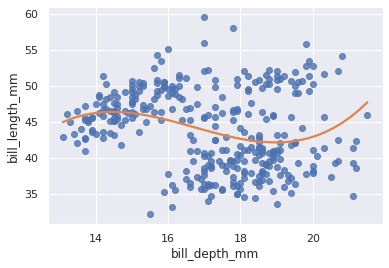

In [6]:
sns.regplot(
    data=df,
    x="bill_depth_mm",
    y="bill_length_mm",
    order=3,  # performs regression with a cubic polynomial
    ci=False,
    line_kws={"color": orange},
);

**2. How can we reproduce & plot a polynomial regression using the Scikit-learn API?**

This requires a _pipeline_ approach, where we first transform the input features before fitting our regular regression model.  Like before, you should obtain a visualization that shows the same data as the Seaborn plot above.

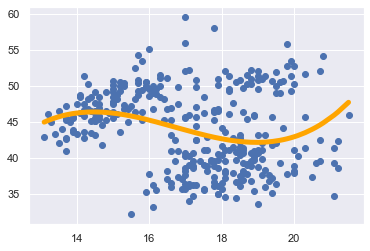

In [48]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

df = df.sort_values('bill_depth_mm', ascending=False)

X = df[["bill_depth_mm"]]
y = df["bill_length_mm"]

model_poly = make_pipeline(
    PolynomialFeatures(3),
    LinearRegression()
)

model_poly.fit(X, y)
y_pred_poly = model_poly.predict(X)
    
plot_pred(y_pred_poly, X, y)

- - - 
## Clustering

Now, let's see if we can cluster penguin species by some of the input features.

### Useful Resources

+ ["In Depth: k-Means Clustering"](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html) and ["In Depth: Gaussian Mixture Models"](https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html) in the _Python Data Science Handbook_.

In Exercise 2, we produced the following plot, in which it almost looks like the three species form relatively well-separable clusters:

<Figure size 432x288 with 1 Axes>

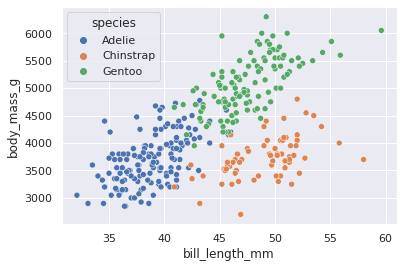

In [8]:
sns.scatterplot(data=df, x="bill_length_mm", y="body_mass_g", hue="species");

**3. Run k-Means clustering (with 3 clusters) on the same two input features (_bill depth_ and _body mass_) and plot the result!** Does it look like you expected?

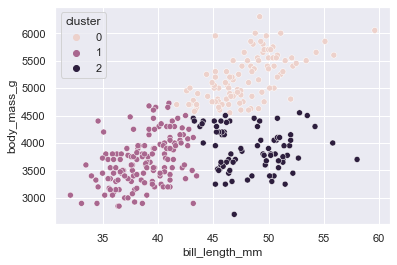

In [58]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

df = df.sort_values('bill_depth_mm', ascending=False)

X = df[["bill_length_mm", "body_mass_g"]]
# y = df["body_mass_g"]

model_kmeans = make_pipeline(
    StandardScaler(),
    KMeans(n_clusters=3)
)
model_kmeans.fit(X)

y_pred_poly = model_kmeans.predict(X)

X_plot = X.copy()
X_plot['cluster'] = y_pred_poly

sns.scatterplot(data=X_plot, x="bill_length_mm", y="body_mass_g", hue="cluster");

**4. Run a Gaussian Mixture Model (GMM) in the same way and plot the result!** If you have never used GMMs before and don't know how they work, the respective section of the Python Data Science Handbook provides a lot of information – but for the purpose of this exercise, it is okay if you simply find out _how to apply_ the model.

_Note:_ If you try to follow the book, you might get an `ImportError` because it is a bit outdated here. You can import the model as follows:

```python
from sklearn.mixture import GaussianMixture as GMM
```

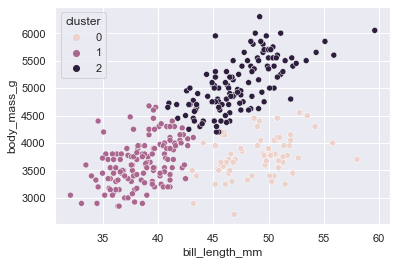

In [62]:
from sklearn.mixture import GaussianMixture as GMM

df = df.sort_values('bill_depth_mm', ascending=False)

X = df[["bill_length_mm", "body_mass_g"]]
# y = df["body_mass_g"]

model_gmm = make_pipeline(
    StandardScaler(),
    GMM(n_components=3)
)
model_gmm.fit(X)

y_pred_gmm = model_gmm.predict(X)

X_plot = X.copy()
X_plot['cluster'] = y_pred_gmm

sns.scatterplot(data=X_plot, x="bill_length_mm", y="body_mass_g", hue="cluster");

**5. Run the GMM model several times. Is the result always the same?** Of course, if a question is phrased like this, the answer is probably "no."  To get more reliable results, you can set the `random_state` when initializating the GMM; but you can also combine several different initializations, e.g. by setting `n_init=10`. Try this out and observe what the predicted clusters look like.

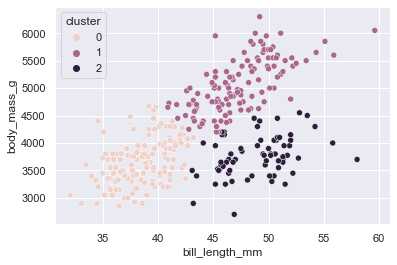

In [63]:
from sklearn.mixture import GaussianMixture as GMM

df = df.sort_values('bill_depth_mm', ascending=False)

X = df[["bill_length_mm", "body_mass_g"]]
# y = df["body_mass_g"]

model_gmm = make_pipeline(
    StandardScaler(),
    GMM(n_components=3, n_init=10)
)
model_gmm.fit(X)

y_pred_gmm = model_gmm.predict(X)

X_plot = X.copy()
X_plot['cluster'] = y_pred_gmm

sns.scatterplot(data=X_plot, x="bill_length_mm", y="body_mass_g", hue="cluster");

- - - 
## Decision Trees & Model Validation

Let's implement a model for a classification problem: we'll try to **predict the penguin species from its four measurements** (bill length, bill depth, flipper length, body mass). We're ignoring the "sex" variable for now.

Here, we can practice how to prepare our data & evaluate our model, and also try out different ways to analyze a decision tree model.

### Useful Resources

+ ["Hyperparameters and Model Validation"](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) from the _Python Data Science Handbook_
+ ["In Depth: Decision Trees and Random Forests"](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html) from the _Python Data Science Handbook_


**6. Split your data into a _train_ and _test_ set!** Use 80% of the data for training and reserve 20% for testing.

In [23]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from copy import deepcopy

new_df = deepcopy(df)
y = new_df.pop('species')
X = new_df
X = X.drop(columns=['sex'])

In [27]:
X = pd.get_dummies(X, columns=['island'])

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)

**7. Train a decision tree classifier and produce predictions on the test set.** It's a good idea to set the `random_state` when you instantiate your classifier, so that your results are the same if you re-run the cells (or the entire notebook).

In [29]:
# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 10)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=10)

In [30]:
y_pred = dtc.predict(X_test)

In [31]:
y_pred

array(['Adelie', 'Gentoo', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Chinstrap',
       'Gentoo', 'Chinstrap', 'Adelie', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Chinstrap'], dtype=object)

**8. Evaluate how well your classifier performs.** Look at:

- accuracy;
- F1-scores for the three target classes (take a look at [the sklearn docs](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) if you're not sure what function to use);
- the absolute number of _wrong_ predictions your classifier made.

If your classifier turns out to be perfect (which can happen here!), change the random state until it's not to make the following task a bit more interesting... ;)

In [34]:
# YOUR CODE HERE
from sklearn.metrics import accuracy_score, f1_score


print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='weighted'))

0.9700442194376463

In [44]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(sum(sum(conf_matrix)) - sum(conf_matrix.diagonal()))

2


In [52]:
conf_matrix.sum() - conf_matrix.diagonal().sum()

2

**9. Plot a _confusion matrix_** that shows how often a class was mistakenly for another. (_Hint:_ This is shown at the end of the ["Random Forests" chapter](https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html).)

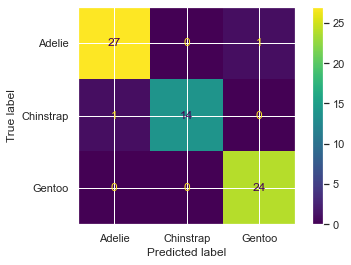

In [54]:
# YOUR CODE HERE
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dtc, X_test, y_test)

**10. What is the first criterion your decision tree splits on? Is there a feature that is (almost) never used?**

Decision trees are easily interpretable, which is one of their main advantages.  Look at Scikit-learn's [`plot_tree` function](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) and see if you can interpret what your classifier has learned.

In [59]:
X

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,0,0,1
1,39.5,17.4,186.0,3800.0,0,0,1
2,40.3,18.0,195.0,3250.0,0,0,1
4,36.7,19.3,193.0,3450.0,0,0,1
5,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0
340,46.8,14.3,215.0,4850.0,1,0,0
341,50.4,15.7,222.0,5750.0,1,0,0
342,45.2,14.8,212.0,5200.0,1,0,0


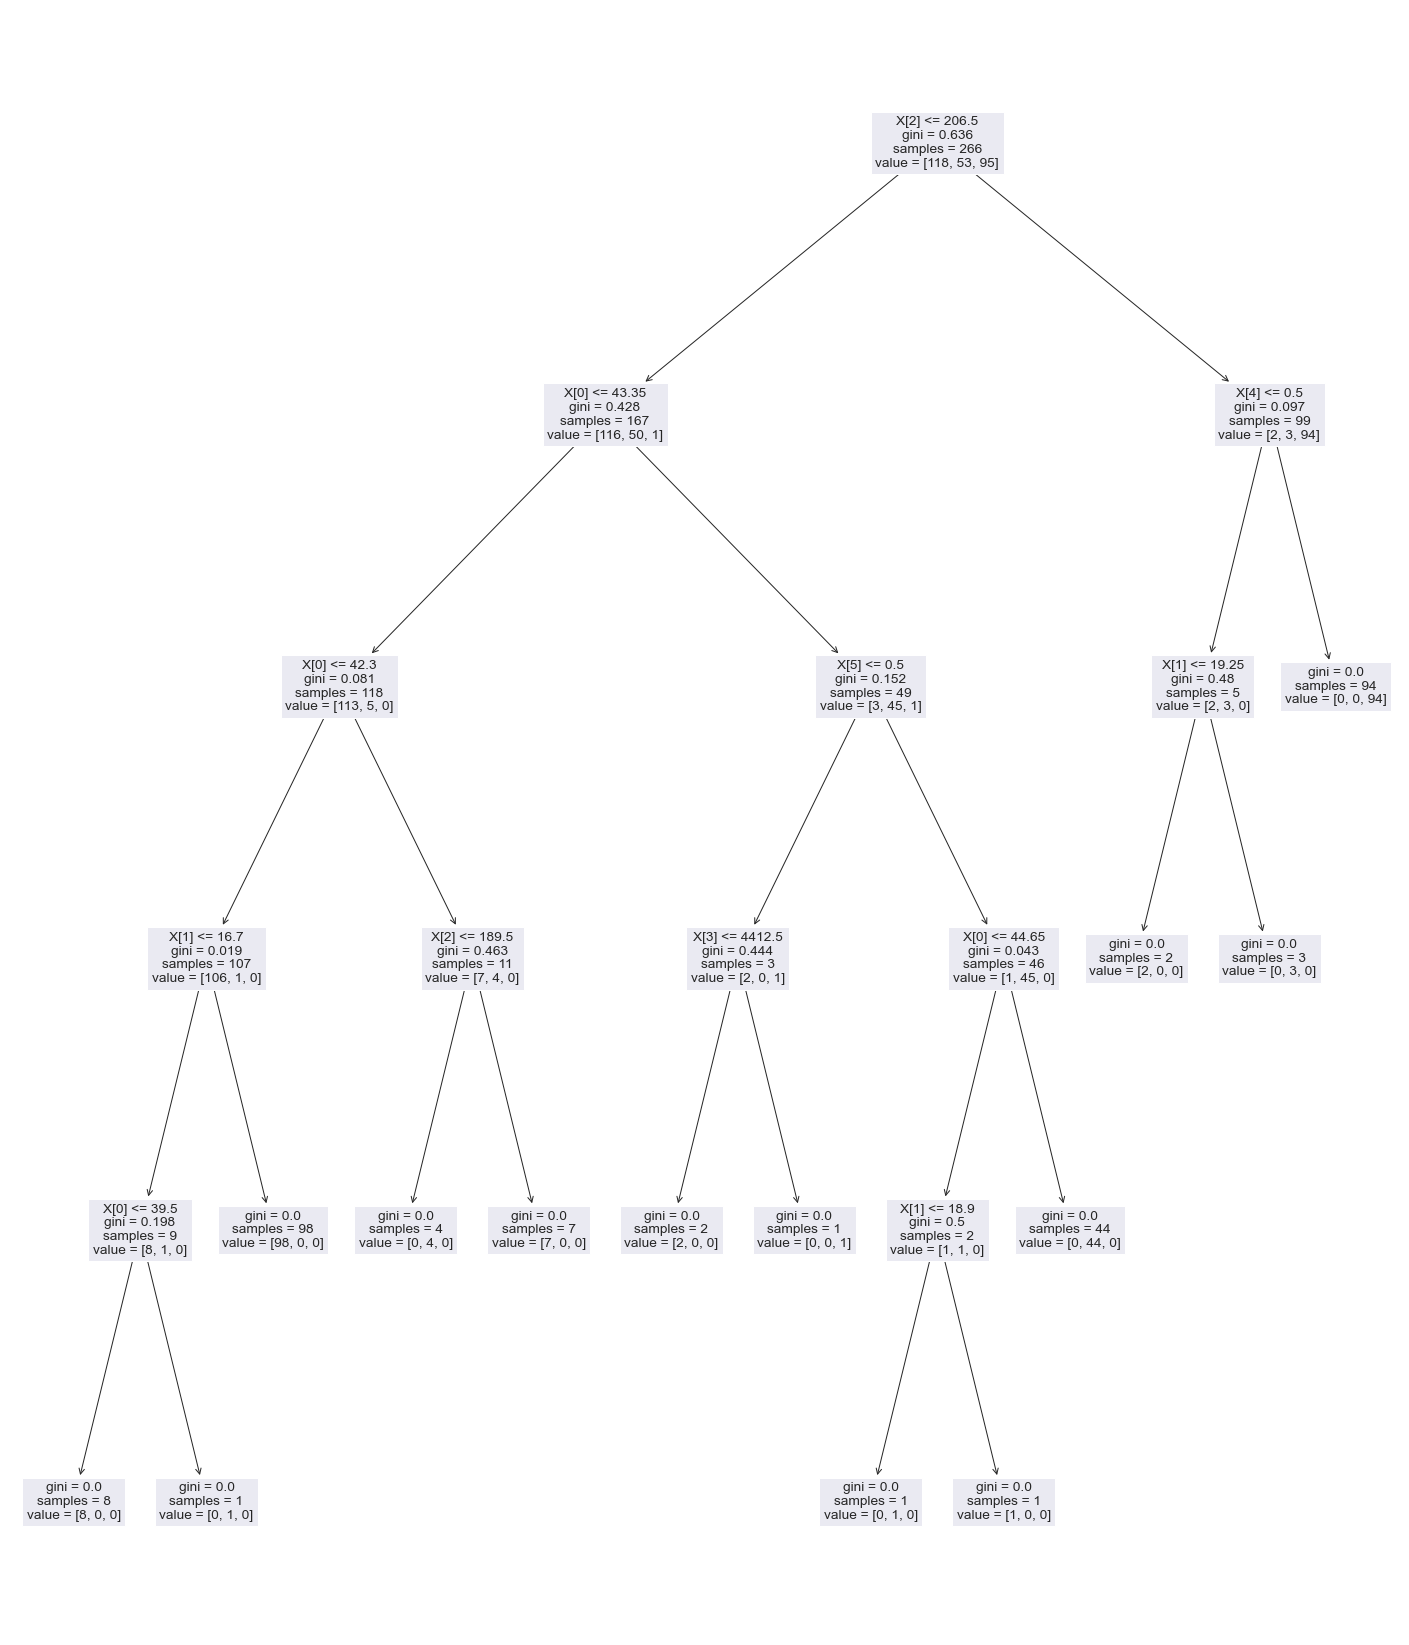

In [58]:
# YOUR CODE HERE
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(25, 30))
plot_tree(dtc)
plt.show()

- - - 
## SVMs, Hyperparameters, and Cross-Validation

Let's try one more classification task: **Can we predict the _sex_ of a penguin just from knowing its _body mass_ and _species_?**  We'll swap out our classifier for a support vector machine (SVM) this time, and practice a bit with automatic hyperparameter search and cross-validation.

### Useful Resources

+ ["Hyperparameters and Model Validation"](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html) from the _Python Data Science Handbook_
+ ["In Depth: Support Vector Machines"](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html) from the _Python Data Science Handbook_

_Note:_ If you try to follow the book, you might again get an `ImportError` on some occasions. Functions related to model validation can now be found in `sklearn.model_selection`, for example:

```python
from sklearn.model_selection import GridSearchCV, cross_val_score
```

**11. Split your data into _train_ and _test_ set again** (this time using "species" and "body mass" as input features and "sex" as the target), but also **_convert the "species" column_ to a one-hot representation!**

Since we want to use a discrete, text-valued column ("species") as one of our input features, we first need to make it numerical somehow, since the SVM will only accept numerical input. _One-hot encoding_ is the easiest choice for that.

_Tip:_ You can get this either through [Pandas' `get_dummies`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html#pandas.get_dummies) or [Scikit-learn's `OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder).

In [66]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC

# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from copy import deepcopy

new_df = deepcopy(df)
y = new_df.pop('sex')
X = new_df[['species', 'body_mass_g']]
X = pd.get_dummies(X, columns=['species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, shuffle=True)

In [69]:
svc = SVC(kernel='linear')

In [70]:
svc.fit(X_train, y_train)

SVC(kernel='linear')

**12. Fit a support vector classifier to the data and evaluate its accuracy!** Use a "linear" kernel and leave the regularization parameter `C=1.0` at its default value.

In [72]:
# YOUR CODE HERE
y_pred = svc.predict(X_test)

In [78]:
y_pred

array(['Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Male', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Male', 'Female', 'Male', 'Female', 'Male', 'Male', 'Female',
       'Male', 'Male', 'Male', 'Female', 'Male', 'Male', 'Male', 'Male',
       'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Female', 'Male', 'Female', 'Female', 'Female', 'Male',
       'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male',
       'Female', 'Female', 'Male'], dtype=object)

In [79]:
accuracy_score(y_test, y_pred)
# f1_score(y_test, y_pred)

0.5373134328358209

**13. Using the same classifier as above, perform _10-fold cross-validation_ to evaluate its accuracy!**  How different is the value from the single evaluation you did before?

In [80]:
# YOUR CODE HERE
from sklearn.model_selection import cross_val_score

cross_val_score(svc, X_train, y_train, cv=10)

array([0.81481481, 0.55555556, 0.66666667, 0.62962963, 0.59259259,
       0.81481481, 0.69230769, 0.53846154, 0.57692308, 0.80769231])

**14. Perform grid search to find the best kernel and regularization value for our task!** Support vector machines are very sensitive to these two hyperparameters in particular. How many parameters you evaluate is up to you (it can take a look time to perform grid search with many parameters!), but you should look at least the "linear" and "rbf" kernels as well as C=1, C=10, C=100.

After this grid search, evaluate your best model configuration again like you did above. Does it perform better?

(You might want to look at both the [section on "Grid Search" in the book](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html#Validation-in-Practice:-Grid-Search) as well as the [Scikit-learn docs](https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search) here.)

In [20]:
# YOUR CODE HERE

In [82]:
from sklearn.model_selection import GridSearchCV

param = {'kernel': ['linear', 'rbf'],
        'C': [1, 10, 100]}

grid = GridSearchCV(SVC(), param)

grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'kernel': ['linear', 'rbf']})

In [85]:
grid.best_estimator_

SVC(C=100)